In [1]:
#!/usr/bin/env python3

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys

from utility import load_mnist_images, load_mnist_labels, sigmoid, \
init_parameters, create_batch, extract_target_data, split_holdout, one_hot_encoding

from Logistic_Regression_MNIST import LogisticRegression
from Softmax_Regression_MNIST import SoftmaxRegression

In [2]:
train_images = load_mnist_images('train-images.idx3-ubyte', 20000)
train_labels = load_mnist_labels('train-labels.idx1-ubyte', 20000)
test_images = load_mnist_images('t10k-images.idx3-ubyte')
test_labels = load_mnist_labels('t10k-labels.idx1-ubyte')

test_images = test_images[-2000:]
test_labels = test_labels[-2000:]

'''
# Show A Image
plt.gray()
plt.imshow(train_images_ori[50])
plt.show()
'''

m_train = train_images.shape[0] # number of training data
m_test = test_images.shape[0] # number of test data

train_images = train_images.reshape(m_train, -1).T / 255.
test_images = test_images.reshape(m_test, -1).T / 255.
print("finish loading")

finish loading


In [3]:
def plot_cost_acc(train, val, test):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    tc_plt, = ax1.plot(train['cost'], label='Training Cost')
    vc_plt, = ax1.plot(val['cost'], label='Validation Cost')
    tec_plt, =  ax1.plot(test['cost'], label='Test Cost')
    ax1.legend(handles=[tc_plt, vc_plt, tec_plt])
    plt.show()
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ta_plt, = ax2.plot(train['accuracy'], label='Training Accuracy')
    va_plt, = ax2.plot(val['accuracy'], label='Validating Accuracy')
    tea_plt, =  ax2.plot(test['accuracy'], label='Test Accuracy')
    ax2.legend(handles=[ta_plt, va_plt, tea_plt], loc=4)
    plt.show()

def plot_weight_image(w, fig=None, subplot_num=1, subplot_idx=1):
    weight = w.reshape(28,28)
    
    fig2 = plt.figure() if fig==None else fig
    plt.gray()
    ax3 = fig2.add_subplot(1, subplot_num, subplot_idx)
    ax3.imshow(weight)


In [5]:
def logistic_classifier(train_images, train_labels, test_images, test_labels, c1, c2, holdout_ratio=0.1):
    train_X, train_Y = extract_target_data(train_images, train_labels, c1, c2)
    test_X, test_Y = extract_target_data(test_images, test_labels, c1, c2)
    
    train_X, train_Y, holdout_X, holdout_Y = split_holdout(train_X, train_Y, holdout_ratio)

    n_feature = train_X.shape[0]

    logistic_model = LogisticRegression(n_feature, n_epoch=400, record=True, record_period=20, early_stop=True, stop_step=5)
    train, val, test = logistic_model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
    logistic_model.predict(test_X, test_Y)
    print('Logistic Regression on Category %d and %d Accuracy: %f %%' % (c1, c2, logistic_model.accuracy * 100))
    
    plot_cost_acc(train, val, test)
    plot_weight_image(logistic_model.w)

Logistic Regression on Category 2 and 3 Accuracy: 98.024691 %


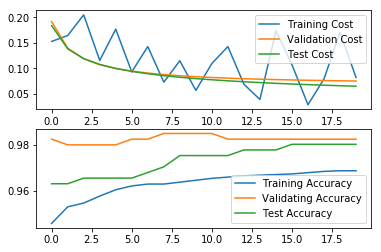

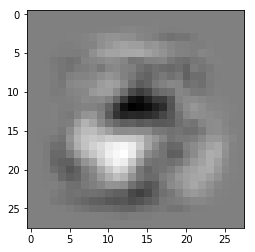

In [5]:
logistic_classifier(train_images, train_labels, test_images, test_labels, 2, 3)

Logistic Regression on Category 2 and 8 Accuracy: 96.103896 %


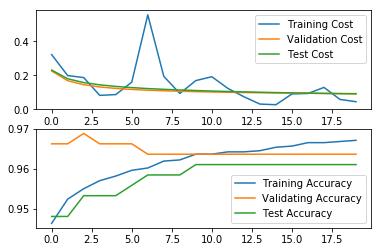

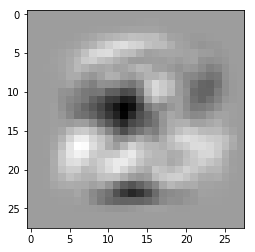

In [6]:
logistic_classifier(train_images, train_labels, test_images, test_labels, 2, 8)

In [25]:
def plot_learning_rate(train_X, train_labels, test_X, test_labels, c1, c2, holdout_ratio=0.1):
    train_X, train_Y = extract_target_data(train_X, train_labels, c1, c2)
    test_X, test_Y = extract_target_data(test_X, test_labels, c1, c2)
    train_X, train_Y, holdout_X, holdout_Y = split_holdout(train_X, train_Y, holdout_ratio)
    n_feature = train_X.shape[0]

    sigmoid_2_model = LogisticRegression(n_feature, n_epoch=400)
    acc_l = []
    
    for i in range(-4, 1):
        sigmoid_2_model.learning_rate = 10**(i)
        sigmoid_2_model.w, sigmoid_2_model.b = init_parameters(n_feature, 1)
        train, val, test = sigmoid_2_model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
        sigmoid_2_model.predict(test_X, test_Y)
        acc_l.append(sigmoid_2_model.accuracy)
        print('Logistic Regression on Category %d and %d in learning rate %f Accuracy: %f %%' % (c1, c2, 10**(i), sigmoid_2_model.accuracy * 100))
    print(acc_l)
    plt.plot(range(-4,1), acc_l)
    plt.xlabel('learning rate(log)')
    plt.ylabel('Accuracy(%)')
    plt.show()

In [29]:
def plot_lambda(train_X, train_labels,  test_X, test_labels, c1, c2, r, holdout_ratio=0.1):
    train_X, train_Y = extract_target_data(train_X, train_labels, c1, c2)
    test_X, test_Y = extract_target_data(test_X, test_labels, c1, c2)
    train_X, train_Y, holdout_X, holdout_Y = split_holdout(train_X, train_Y, holdout_ratio)
    n_feature = train_X.shape[0]


    sigmoid_2_model = LogisticRegression(n_feature, n_epoch=400, record=True, record_period=20)

    sigmoid_2_model.regularized = r
    acc_l = []
    fig1 = plt.figure()
    fig3 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax3 = fig3.add_subplot(111)
    legends = []

    weight_length = []
    weights2 = []
    for i in range(-4, 1):
        sigmoid_2_model.lambd = 10**(i)
        sigmoid_2_model.w, sigmoid_2_model.b = init_parameters(n_feature, 1)
        train, val, test = sigmoid_2_model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
        weight_length.append(np.linalg.norm(sigmoid_2_model.w, r))
        l, = ax1.plot(train['accuracy'],label='lambda=%f'%(10**i))
        l3, = ax3.plot(1-np.array(test['accuracy']) ,label='lambda=%f'%(10**i))
        weights2.append(sigmoid_2_model.w)
        print('train',train['accuracy'][-1])
        legends.append(l)

        acc_l.append(1 - test['accuracy'][-1])
        print('Logistic  Regression on Category %d and %d in lamda %f Accuracy: %f %%' \
              % (2, 3, 10**(i), sigmoid_2_model.accuracy * 100))
    ax1.legend(handles=legends)
    ax1.set_title('Training Accuracy')
    ax3.legend(handles=legends)
    ax3.set_title('Test Error')
    plt.show()
    print(acc_l)

    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.plot(range(-4,1), np.array(acc_l)*100)
    plt.xlabel('lambda(log)')
    plt.ylabel('Error(%)')
    plt.show()

    fig4 = plt.figure()
    plt.plot(range(-4,1), weight_length)
    plt.xlabel("lambda (log)")
    plt.ylabel("Weight Length")
    plt.show()
    
    weightf=plt.figure(figsize=(30,100))
    plt.gray()
    for i in range(-4, 1):
        ax = weightf.add_subplot(1,5,i+5)
        print(np.linalg.norm(weights2[i]))
        ax.imshow(weights2[i].reshape(28,28))


Logistic Regression on Category 2 and 3 in learning rate 0.000100 Accuracy: 96.296296 %
Logistic Regression on Category 2 and 3 in learning rate 0.001000 Accuracy: 98.024691 %
Logistic Regression on Category 2 and 3 in learning rate 0.010000 Accuracy: 98.271605 %
Logistic Regression on Category 2 and 3 in learning rate 0.100000 Accuracy: 98.271605 %
Logistic Regression on Category 2 and 3 in learning rate 1.000000 Accuracy: 98.271605 %
[0.9629629629629629, 0.980246913580247, 0.9827160493827161, 0.9827160493827161, 0.9827160493827161]


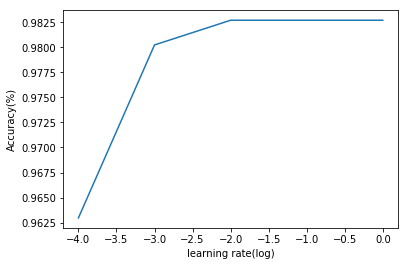

In [30]:
plot_learning_rate(train_images, train_labels, test_images, test_labels, 2, 3)

train 0.9686546463245492
Logistic  Regression on Category 2 and 3 in lamda 0.000100 Accuracy: 98.024691 %
train 0.9686546463245492
Logistic  Regression on Category 2 and 3 in lamda 0.001000 Accuracy: 98.024691 %
train 0.9686546463245492
Logistic  Regression on Category 2 and 3 in lamda 0.010000 Accuracy: 98.024691 %
train 0.9628294036061026
Logistic  Regression on Category 2 and 3 in lamda 0.100000 Accuracy: 97.283951 %
train 0.935367545076283
Logistic  Regression on Category 2 and 3 in lamda 1.000000 Accuracy: 96.296296 %


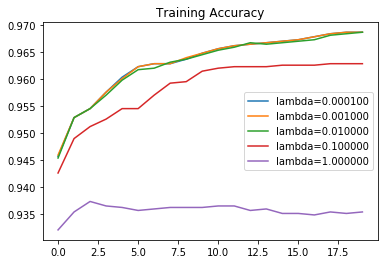

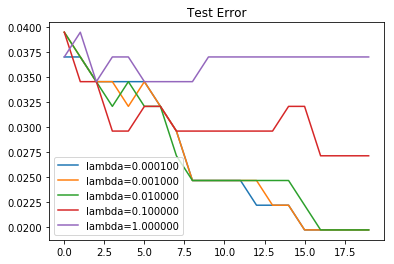

[0.01975308641975304, 0.01975308641975304, 0.01975308641975304, 0.02716049382716046, 0.03703703703703709]


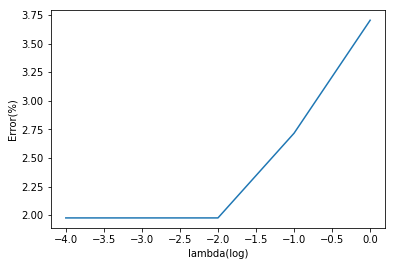

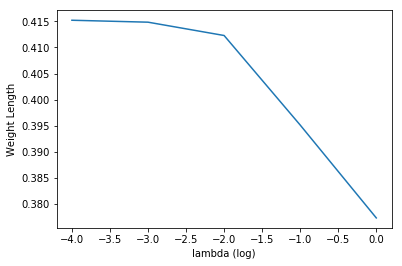

2.551529052837507
2.462665759257437
1.972160610255247
1.1367228567475538
2.5611759912215963


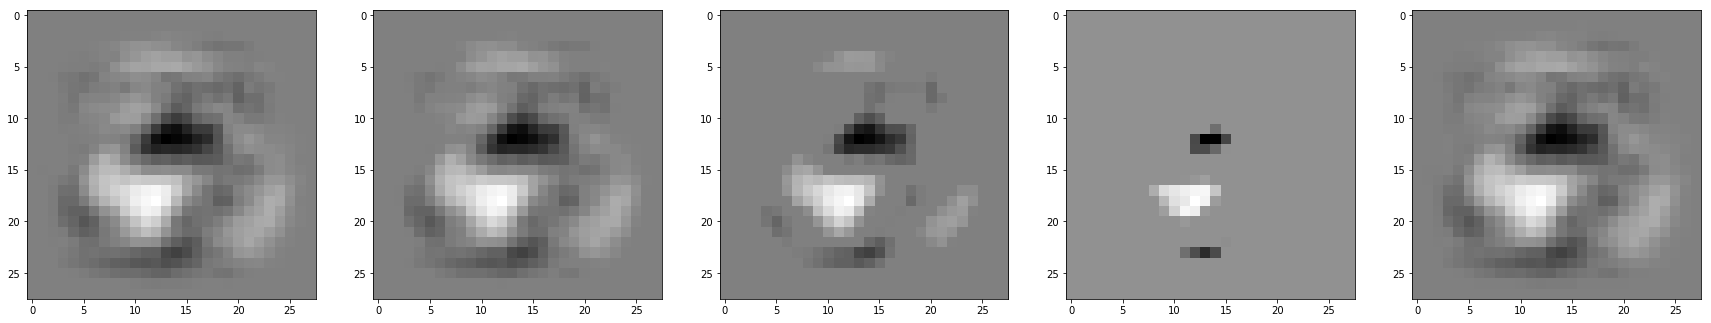

In [31]:
# Regularization 1
plot_lambda(train_images, train_labels, test_images, test_labels, 2, 3, r=1)

train 0.9686546463245492
Logistic  Regression on Category 2 and 3 in lamda 0.000100 Accuracy: 98.024691 %
train 0.9686546463245492
Logistic  Regression on Category 2 and 3 in lamda 0.001000 Accuracy: 98.024691 %
train 0.9686546463245492
Logistic  Regression on Category 2 and 3 in lamda 0.010000 Accuracy: 98.024691 %
train 0.968377253814147
Logistic  Regression on Category 2 and 3 in lamda 0.100000 Accuracy: 98.024691 %
train 0.9625520110957004
Logistic  Regression on Category 2 and 3 in lamda 1.000000 Accuracy: 96.790123 %


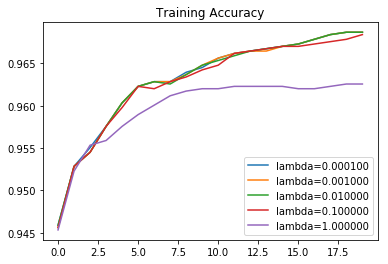

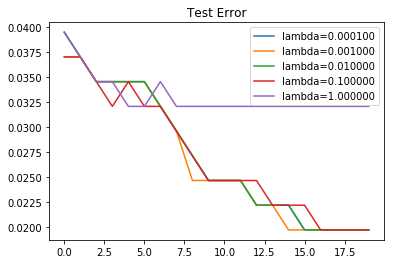

[0.01975308641975304, 0.01975308641975304, 0.01975308641975304, 0.01975308641975304, 0.032098765432098775]


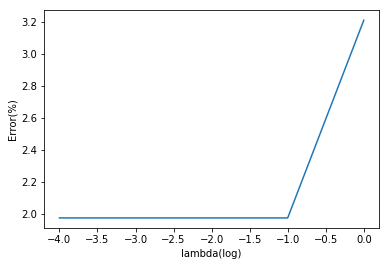

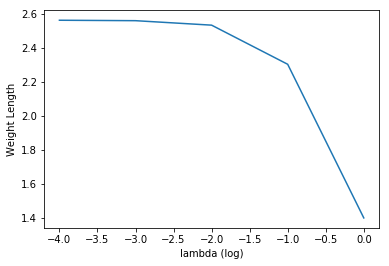

2.5592585976767257
2.5329822346537605
2.3027937997669774
1.3989995917204
2.5618568973537


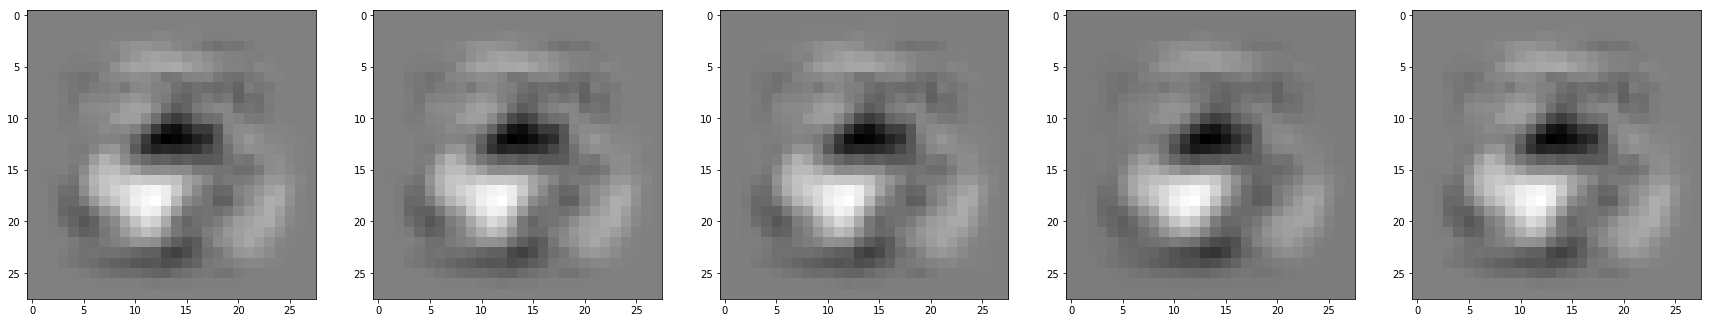

In [33]:
# Regularization 2
plot_lambda(train_images, train_labels, test_images, test_labels, 2, 3, r=2)

In [12]:
def softmax_classifier(train_images, train_labels, test_images, test_labels, holdout_ratio=0.1, regularized=2, lambd=0.001):
    train_X = train_images
    test_X = test_images
    train_Y = one_hot_encoding(train_labels, 10)
    test_Y = one_hot_encoding(test_labels, 10)
    
    train_X, train_Y, holdout_X, holdout_Y = split_holdout(train_X, train_Y, holdout_ratio)
    n_feature = train_X.shape[0]
    n_classes = 10
    
    softmax_model = SoftmaxRegression(n_feature, n_classes, n_epoch=400, learning_rate=0.00001, record=True, record_period=5, early_stop=True, stop_step=5)
    train, val, test = softmax_model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
    softmax_model.predict(test_X, test_Y)

    print("Training loss %f,  Val loss %f , Test loss: %f "%(train['cost'][-1], val['cost'][-1], test['cost'][-1]))
    print("Training accuracy %f %%, Val accuracy %f %%, Test accuracy: %f %%"%(train['accuracy'][-1]*100, val['accuracy'][-1]*100, test['accuracy'][-1]*100))
    plot_cost_acc(train, val, test)
    
    
    for i in range(10):
        fig1 = plt.figure();
        p = train_labels[:train_X.shape[1]]==i
        average_weight = np.mean(train_X[:,p], axis=1)
        plot_weight_image(softmax_model.parameters['w'][i].reshape(28,28), fig=fig1, subplot_num=2, subplot_idx=1)
        plot_weight_image(average_weight.reshape(28,28), fig=fig1, subplot_num=2, subplot_idx=2)
        plt.show()

Training loss 0.186065,  Val loss 0.284898 , Test loss: 0.214721 
Training accuracy 91.983333 %, Val accuracy 92.750000 %, Test accuracy: 93.800000 %


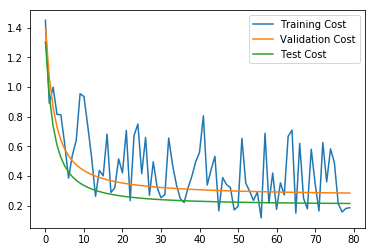

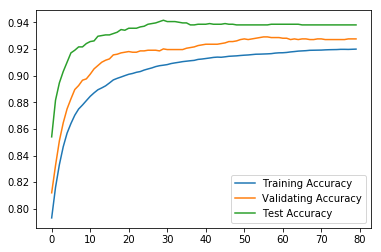

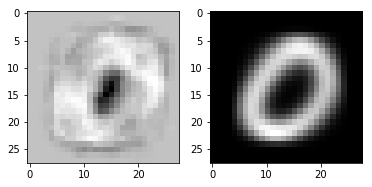

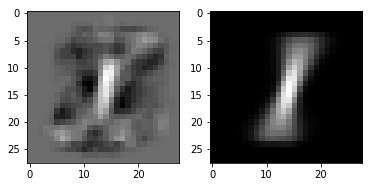

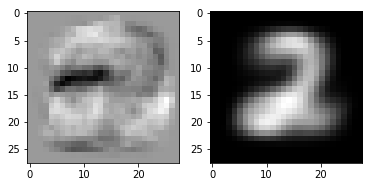

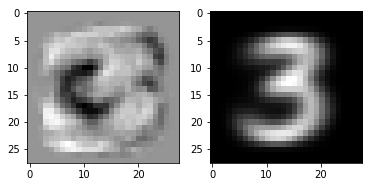

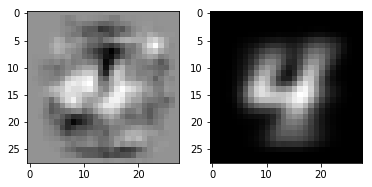

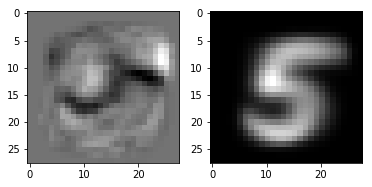

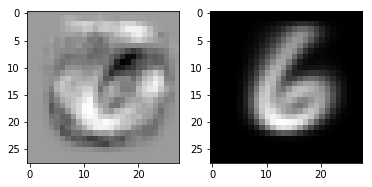

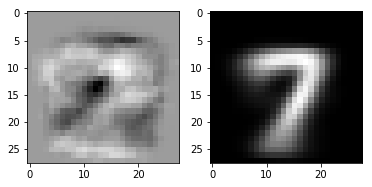

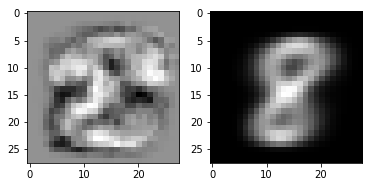

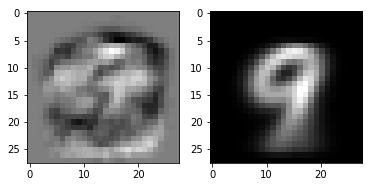

In [13]:
softmax_classifier(train_images, train_labels, test_images, test_labels)

In [14]:
def plot_lambda_softmax(train_images, train_labels, test_images, test_labels, r, holdout_ratio=0.1):
    train_X = train_images
    test_X = test_images
    train_Y = one_hot_encoding(train_labels, 10)
    test_Y = one_hot_encoding(test_labels, 10)
   
    train_X, train_Y, holdout_X, holdout_Y = split_holdout(train_X, train_Y, holdout_ratio)
    train_X, train_Y, holdout_X, holdout_Y = split_holdout(train_X, train_Y, holdout_ratio)
    
    n_classes = 10
    n_feature = train_X.shape[0]
    
    softmax_model = SoftmaxRegression(n_feature, n_classes, learning_rate=0.00001, n_epoch=400, record=True, record_period=20, early_stop=True, stop_step=5)
    softmax_model.regularized = r
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    acc = []
    legends = []
    
    for i in range(-4, 1):
        softmax_model.lambd = 10**(i)
        softmax_model.w, softmax_model.b = init_parameters(n_feature, n_classes)
        train, val, test = softmax_model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
        l, = ax1.plot(val['accuracy'],label='lambda=%f'%(10**i))
        acc.append(val['accuracy'][-1])
        legends.append(l)

        print('Softmax Regression with lambda %f  Accuracy: %f %%' % (10**(i), softmax_model.accuracy * 100))
       
    ax1.legend(handles=legends)
    ax1.set_title('Holdout Accuracy')
    plt.show()

    fig2 = plt.figure()
    plt.plot(range(-4,1), np.array(acc)*100)
    plt.xlabel('lambda(log)')
    plt.ylabel('Holdout Accuracy(%)')
    plt.show()



Softmax Regression with lambda 0.000100  Accuracy: 93.850000 %
Softmax Regression with lambda 0.001000  Accuracy: 94.100000 %
Early stop at 120 epoch
Softmax Regression with lambda 0.010000  Accuracy: 90.166667 %
Early stop at 120 epoch
Softmax Regression with lambda 0.100000  Accuracy: 86.833333 %
Early stop at 120 epoch
Softmax Regression with lambda 1.000000  Accuracy: 47.944444 %


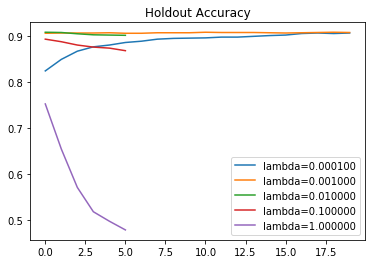

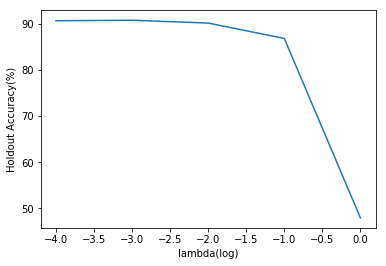

In [15]:
# Regularization 1
plot_lambda_softmax(train_images, train_labels, test_images, test_labels, 1, holdout_ratio=0.1)

Early stop at 120 epoch
Softmax Regression with lambda 0.000100  Accuracy: 90.444444 %
Softmax Regression with lambda 0.001000  Accuracy: 93.950000 %
Early stop at 220 epoch
Softmax Regression with lambda 0.010000  Accuracy: 90.277778 %
Early stop at 300 epoch
Softmax Regression with lambda 0.100000  Accuracy: 87.944444 %
Softmax Regression with lambda 1.000000  Accuracy: 90.850000 %


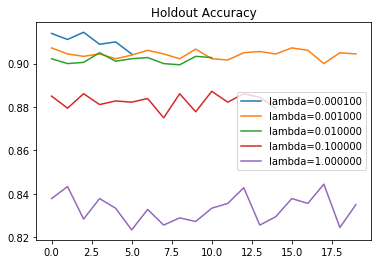

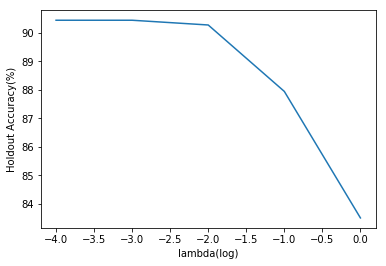

In [14]:
# Regularization 2
plot_lambda_softmax(train_images, train_labels, test_images, test_labels, 2, holdout_ratio=0.1)